## NEHAL JOSHI Q2

In [29]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In this program, I have compared two techniques for sentiment analysis. One was using textblob,while my main focus was to show the advantages of another approach,called FEATURE BASED SENTIMENT ANALYSIS.

I was inspired by this research paper to carry out the feature based sentiment analysis. https://www.aclweb.org/anthology/S15-2082.pdf

It refers to determining the opinions or sentiments expressed on different features or aspects of entities, e.g., of a cell phone, a digital camera, or a bank.A feature or aspect is an attribute or component of an entity, e.g., the screen of a cell phone, the service for a restaurant, or the picture quality of a camera. The advantage of feature-based sentiment analysis is the possibility to capture nuances about objects of interest. Different features can generate different sentiment responses, for example a hotel can have a convenient location, but mediocre food.This problem involves several sub-problems, e.g., identifying relevant entities, extracting their features/aspects, and determining whether an opinion expressed on each feature/aspect is positive, negative or neutral.The automatic identification of features can be performed with syntactic methods, with topic modeling,or with deep learning.More detailed discussions about this level of sentiment analysis can be found in Liu's work.
(https://en.wikipedia.org/wiki/Sentiment_analysis#Feature/aspect-based)

I have used textblob first(for the calculation of the polarity,correct spelling errors),matplotlib because it is a widely used library to plot data in the form of histograms, bar charts, pie charts, scatter plots and heat maps and helps in observing several features after the sentiment analysis.Also, it works with almost every operating system.I also used seaborn,mainly to provide a variety in using the different types of representation of data.

I used the youtube API(youtube commenthreads list) to extract comments from the following video(https://www.youtube.com/watch?v=si8zZHkufRY).The task assigned was to analyse a youtube channel, but the channel I wanted to use here(https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A) consists of a lot of data in the form of comments,and due to computational restraints,I decided to take up a single video from the page.
The response extracted from the the API was stored in csv format mainly because it is very versatile.The file has been named as 'data.csv'.

In [30]:
import csv
with open('data.csv', 'r',encoding='utf8', errors='ignore') as f:
  reader = csv.reader(f)
  result = list(reader)

result = result[0]
result[:10]

['Is any resource that shows clearer the conversion and the format of the input reviews?',
 'I subscribed because I like the content, but i think these videos are more for people who have an intermediate level understanding of python. I can follow the conceptual bits, but as soon as you start programming it with python, you explain your steps but only on a very high level.\nCould you recommend a place where I can learn programming ML by building on the fundamental concepts?\n\nbtw nice rap ;p',
 'What text editor are you using, Siraj?',
 'python version-3.6.1 ,Anaconda-4.4.0  code for this version of this tutorial-------\nhttps://github.com/ankitAMD/Ankit_Siraj5_Sentiment_Analysis/blob/master/siraj_tut-5_sentiment_analysis.ipynb\n\nhttps://github.com/ankitAMD/Ankit_Siraj5_Sentiment_Analysis',
 "lol, as an german i never used waldeinsamkeit :P i'v only used einsamkeit, without wald",
 "Just curious, how long did it take y'all to train the neural net that siraj wrote. I ran mine on a gtx

In [31]:
# Text cleaning 
from string import punctuation
import re

def clean_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+|\n+", "", sentence.lower())
    sent = TextBlob(sentence)
    sent.correct()
    clean = ""
    for sentence in sent.sentences:    
        words = sentence.words
    
        words = [''.join(c for c in s if c not in punctuation) for s in words]
        words = [s for s in words if s]
        clean += " ".join(words)
        clean += ". "
    return clean

result = [clean_sentence(x) for x in result]
result[:10]

['is any resource that shows clearer the conversion and the format of the input reviews. ',
 'i subscribed because i like the content but i think these videos are more for people who have an intermediate level understanding of python. i can follow the conceptual bits but as soon as you start programming it with python you explain your steps but only on a very high levelcould you recommend a place where i can learn programming ml by building on the fundamental concepts btw nice rap p. ',
 'what text editor are you using siraj. ',
 'python version361 anaconda440 code for this version of this tutorial. ',
 'lol as an german i never used waldeinsamkeit p i v only used einsamkeit without wald. ',
 'just curious how long did it take yall to train the neural net that siraj wrote. i ran mine on a gtx 1080 ti and it took 26 seconds per epoch. ',
 'hi siraj i think your videos are great but i spotted a small mistake in this one. in the last part you call validation set like this validationset te

In [32]:
# sentiment polarity 
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

is any resource that shows clearer the conversion and the format of the input reviews. : POLARITY=0.0
i subscribed because i like the content but i think these videos are more for people who have an intermediate level understanding of python. i can follow the conceptual bits but as soon as you start programming it with python you explain your steps but only on a very high levelcould you recommend a place where i can learn programming ml by building on the fundamental concepts btw nice rap p. : POLARITY=0.32699999999999996
what text editor are you using siraj. : POLARITY=0.0
python version361 anaconda440 code for this version of this tutorial. : POLARITY=0.0
lol as an german i never used waldeinsamkeit p i v only used einsamkeit without wald. : POLARITY=0.26666666666666666
just curious how long did it take yall to train the neural net that siraj wrote. i ran mine on a gtx 1080 ti and it took 26 seconds per epoch. : POLARITY=-0.05000000000000001
hi siraj i think your videos are great but

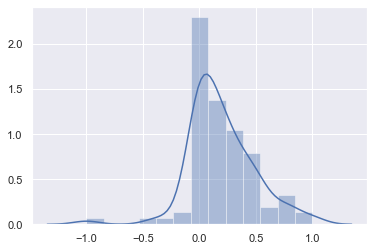

In [33]:
sns.distplot(sentiment_scores)

We can see that a majority of the comments are marked as neutral (though slightly on the positive side). This basically implies that TextBlob Sentiment analysis 'averages' out over a sentence.

In [34]:
# Convert array of comments into a single string
comments = TextBlob(' '.join(result))

In [35]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Nehal\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

The Natural Language ToolKit was used here because it contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [36]:
# noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

WordList(['shows clearer', 'input reviews', 'intermediate level understanding', 'conceptual bits', 'high levelcould', 'fundamental concepts btw', 'nice rap p.', 'text editor', 'python version361 anaconda440 code', 'german i', 'waldeinsamkeit p i v', 'neural net', 'hi siraj i', 'small mistake', 'validationset textx texty', 'nt work', 'validationset textx testy', 'i m', 'new text', 'i d', 'i m', 'real world problems', 'i ca nt', 'movie review', 'awesome videso', 'background research im', 'imdb database', 'storage format', 'ai pleb', 'hey siraj i', 'error list index', 'case i', 'current state', 'sentiment analysis', 'size thats', 'i download code', 'nnet architecture', 'wow i', 'catchy informative', 'just awesome course i', 'absolute popularity', 'integers source', 'name validationset', 'neural net', 'btw thanks', 'great videos', 'image recognition', 'теперь я знаю что случилось с рилигетард хаха', 'забавно но понятно зачем менять', 'сегодня было бы трудно быть общественным деятелем и выр

In [37]:
#pruning:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

After compactness pruning:
Feature Size:


125

Quite a lot of these noun phrases are repeated or have the same subset of words. We now run modified versions of  redundancy pruning and compactness pruning.

Compactness pruning: 

We check for compact phrases and see if the words in the phrases make sense. For e.g the phrase "i m" fails the compact pruning test and is pruned. A simple way to carry out compact pruning is by checking the words in a phrase and seeing if a dictionary meaning exists. If the number of words in the phrase without dictionary meanings cross a certain threshold, we prune the phrase. (This can be counter-intuitive at times, because technical terms that do not have a dictionary meaning can get pruned).

In [38]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)

    if len(match) >= len(cleaned)*0.1 :
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned


After redundancy pruning:
Feature Size:78
Cleaned features:


['shows clearer',
 'input reviews',
 'intermediate level understanding',
 'conceptual bits',
 'fundamental concepts btw',
 'nice rap p.',
 'neural net',
 'small mistake',
 'real world problems',
 'movie review',
 'error list index',
 'current state',
 'i download code',
 'just awesome course i',
 'absolute popularity',
 'integers source',
 'neural net',
 'accuracy score',
 'cool stuff',
 'buddhist vipassana tradition',
 'dark night',
 'code trains',
 'new phrases',
 'new data inputs',
 'conceptual side',
 'quick cuts',
 'inexplicable reason',
 'jurassic park scene',
 'nice video',
 'new delhi india',
 'computer science',
 'college project',
 'naive bayes',
 'main area',
 'specific reviews',
 'final year project',
 'pro series',
 'previous video',
 'right predictions anyways i',
 'such thing',
 'dependency thing',
 'size vectors',
 'lstm need use',
 'input neural net word',
 'neural net',
 'index representation',
 'input vector',
 'possible output values',
 'raw word',
 'super awesome v

We now find the noun phrases with maximum frequencies and select the "frequent feature set" using a certain cutoff.

In [39]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

shows clearer: 2
input reviews: 11
intermediate level understanding: 4
conceptual bits: 3
fundamental concepts btw: 5
nice rap p.: 7
neural net: 10
small mistake: 2
real world problems: 4
movie review: 4
error list index: 7
current state: 2
i download code: 13
just awesome course i: 7
absolute popularity: 2
integers source: 3
neural net: 10
accuracy score: 2
cool stuff: 5
buddhist vipassana tradition: 3
dark night: 2
code trains: 12
new phrases: 8
new data inputs: 13
conceptual side: 4
quick cuts: 2
inexplicable reason: 2
jurassic park scene: 3
nice video: 18
new delhi india: 9
computer science: 2
college project: 6
naive bayes: 2
main area: 2
specific reviews: 3
final year project: 7
pro series: 3
previous video: 16
right predictions anyways i: 5
such thing: 4
dependency thing: 6
size vectors: 3
lstm need use: 16
input neural net word: 25
neural net: 10
index representation: 5
input vector: 12
possible output values: 7
raw word: 7
super awesome video: 23
side effect tflearn: 10
fat be

In [40]:
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
        
print('Frequent Features:')
frequent_features

Threshold:2.25
Frequent Features:


['input reviews',
 'intermediate level understanding',
 'conceptual bits',
 'fundamental concepts btw',
 'nice rap p.',
 'neural net',
 'real world problems',
 'movie review',
 'error list index',
 'i download code',
 'just awesome course i',
 'integers source',
 'cool stuff',
 'buddhist vipassana tradition',
 'code trains',
 'new phrases',
 'new data inputs',
 'conceptual side',
 'jurassic park scene',
 'nice video',
 'new delhi india',
 'college project',
 'specific reviews',
 'final year project',
 'pro series',
 'previous video',
 'right predictions anyways i',
 'such thing',
 'dependency thing',
 'size vectors',
 'lstm need use',
 'input neural net word',
 'index representation',
 'input vector',
 'possible output values',
 'raw word',
 'super awesome video',
 'side effect tflearn',
 'good work',
 'output results',
 'baby activation functionstrack',
 'life video',
 'code challenge submission',
 'challenge code',
 'git repo pip install git',
 'dependency curses',
 'normal python sc

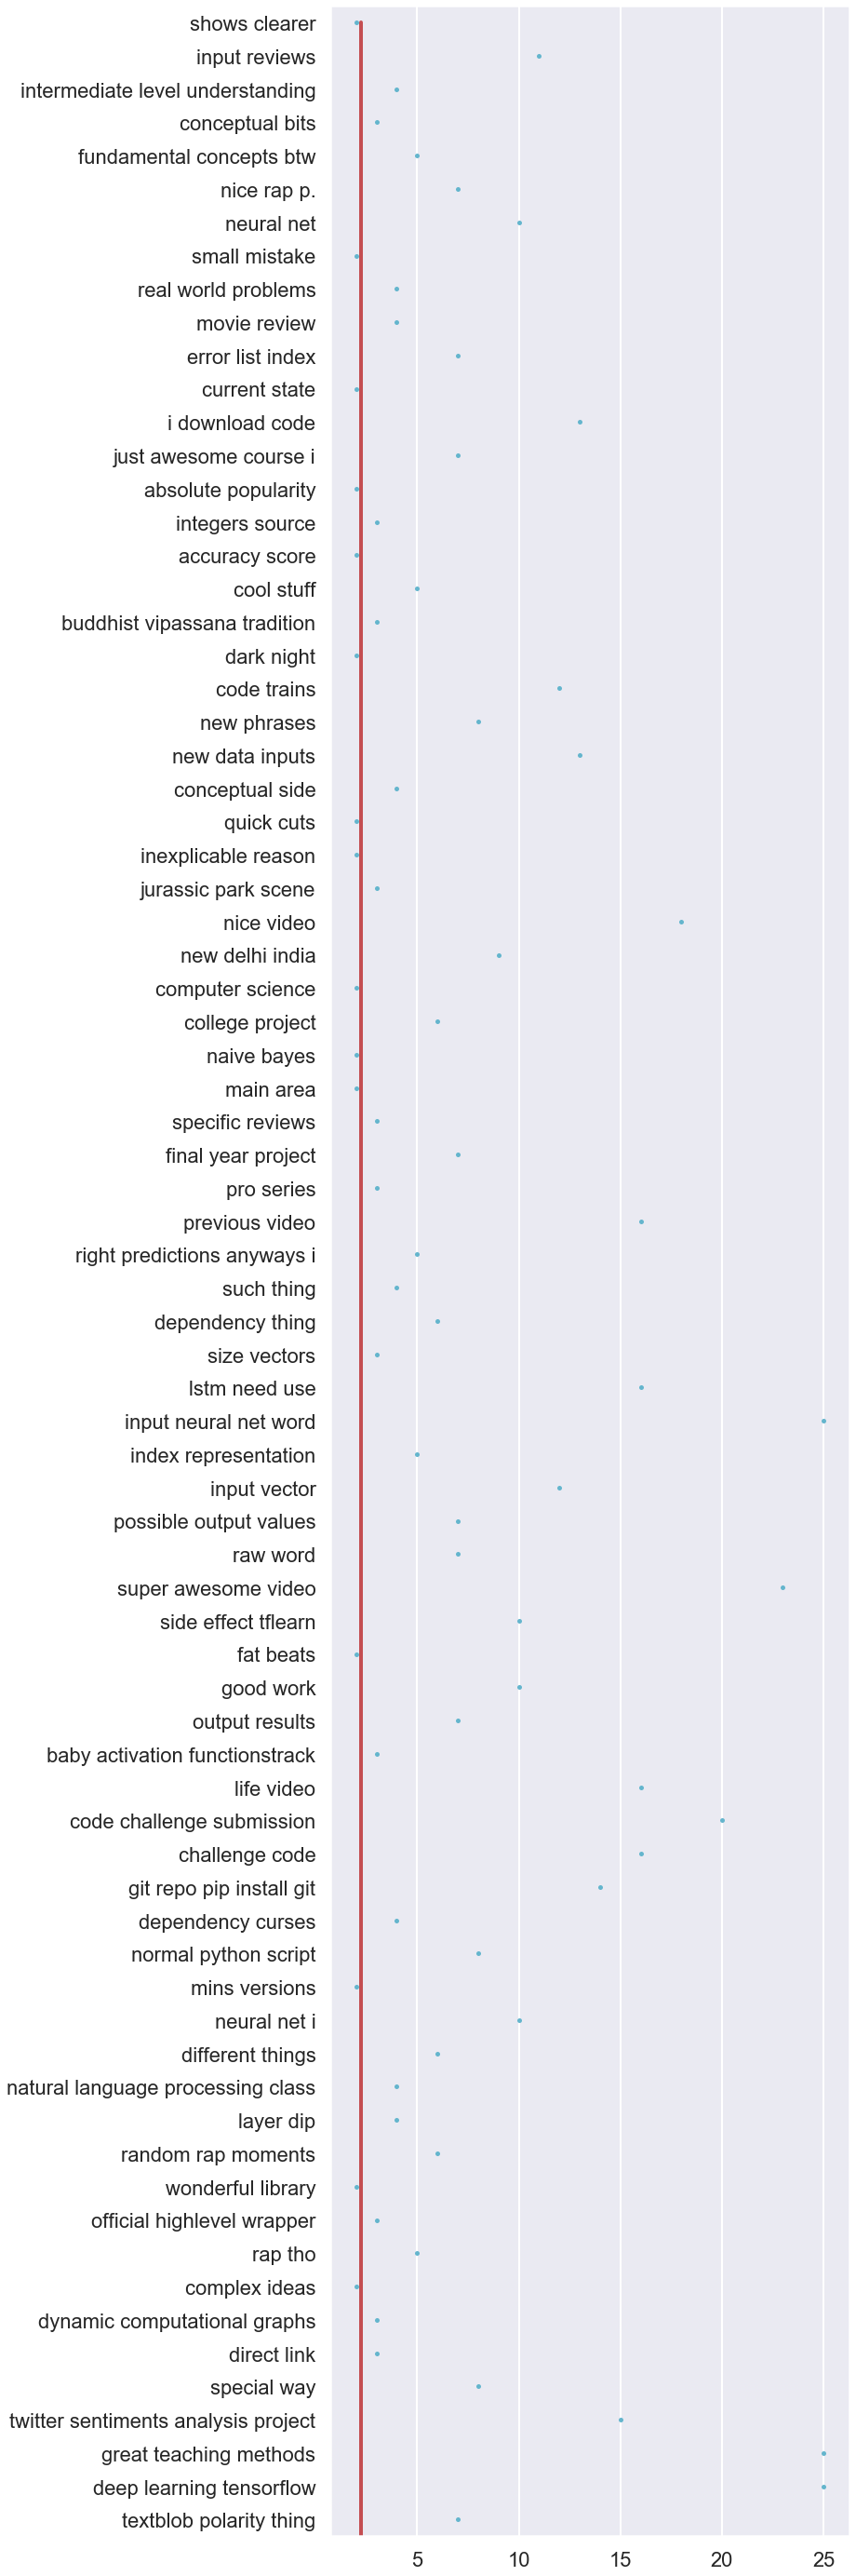

In [41]:
# Plotting these feature occurences and draw the threshold line
sns.set()
sns.set_context("poster")
f, ax = plt.subplots(figsize=(10, 50))
sns.swarmplot(y=features, x=counts, color="c", ax=ax)
plt.plot([threshold, threshold], [0, len(features)], linewidth=4, color="r")

## Feature Specific Sentiment Analysis

Now that we have the frequent features, we scan through the comments and find the sentences that contain these features. We then run sentiment analysis on these 'feature specific' sentences to get somewhat crude feature based sentiment scores. Further refinement will include generalizing the features, for e.g: "wonderful python library" could be generalized to "software", which will eventually lead to aspect wise sentiment scores.

In [42]:
absa_list = dict()
for f in frequent_features:
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        for sentence in blob.sentences:
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)




## Aspect based sentiment scoring
Now that we have aspect specific sentences, all we have to do is run sentiment analysis on each sentence using TextBlob's sentiment analyzer.


In [43]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)

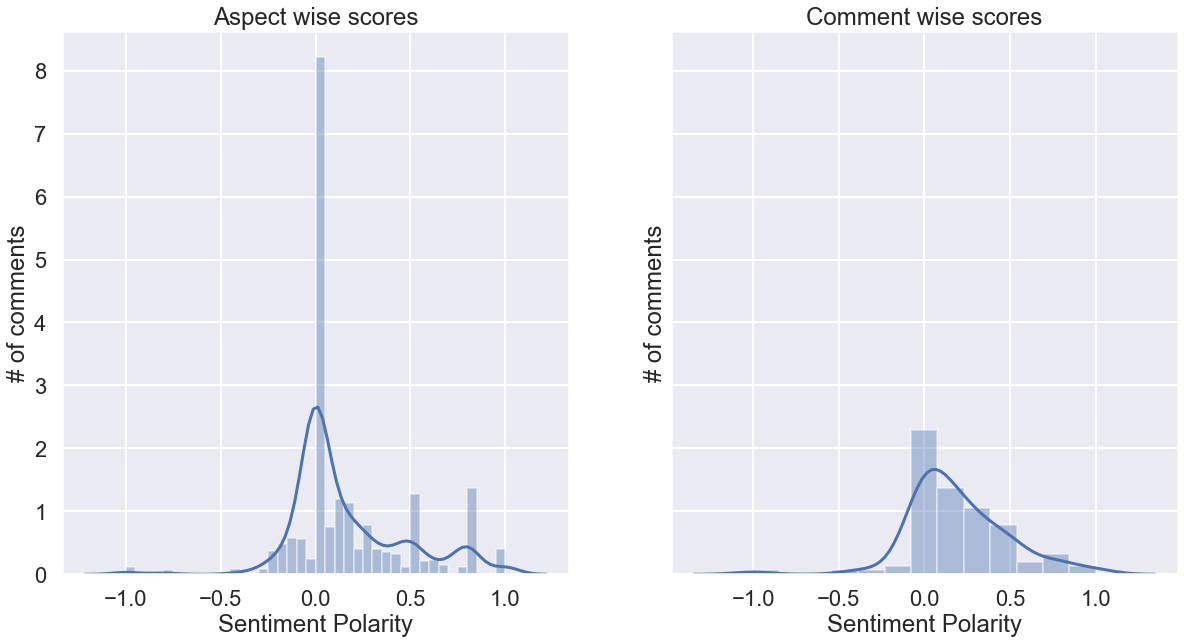

In [44]:
# For comparison,replot the previous global sentiment polarity plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
plot1 = sns.distplot(scores, ax=ax1)

ax1.set_title('Aspect wise scores')
ax1.set_xlabel('Sentiment Polarity')
ax1.set_ylabel('# of comments')

ax2.set_title('Comment wise scores')
ax2.set_xlabel('Sentiment Polarity')
ax2.set_ylabel('# of comments')

plot2 = sns.distplot(sentiment_scores, ax=ax2)

plotting the scores grouped by aspects

In [45]:
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)

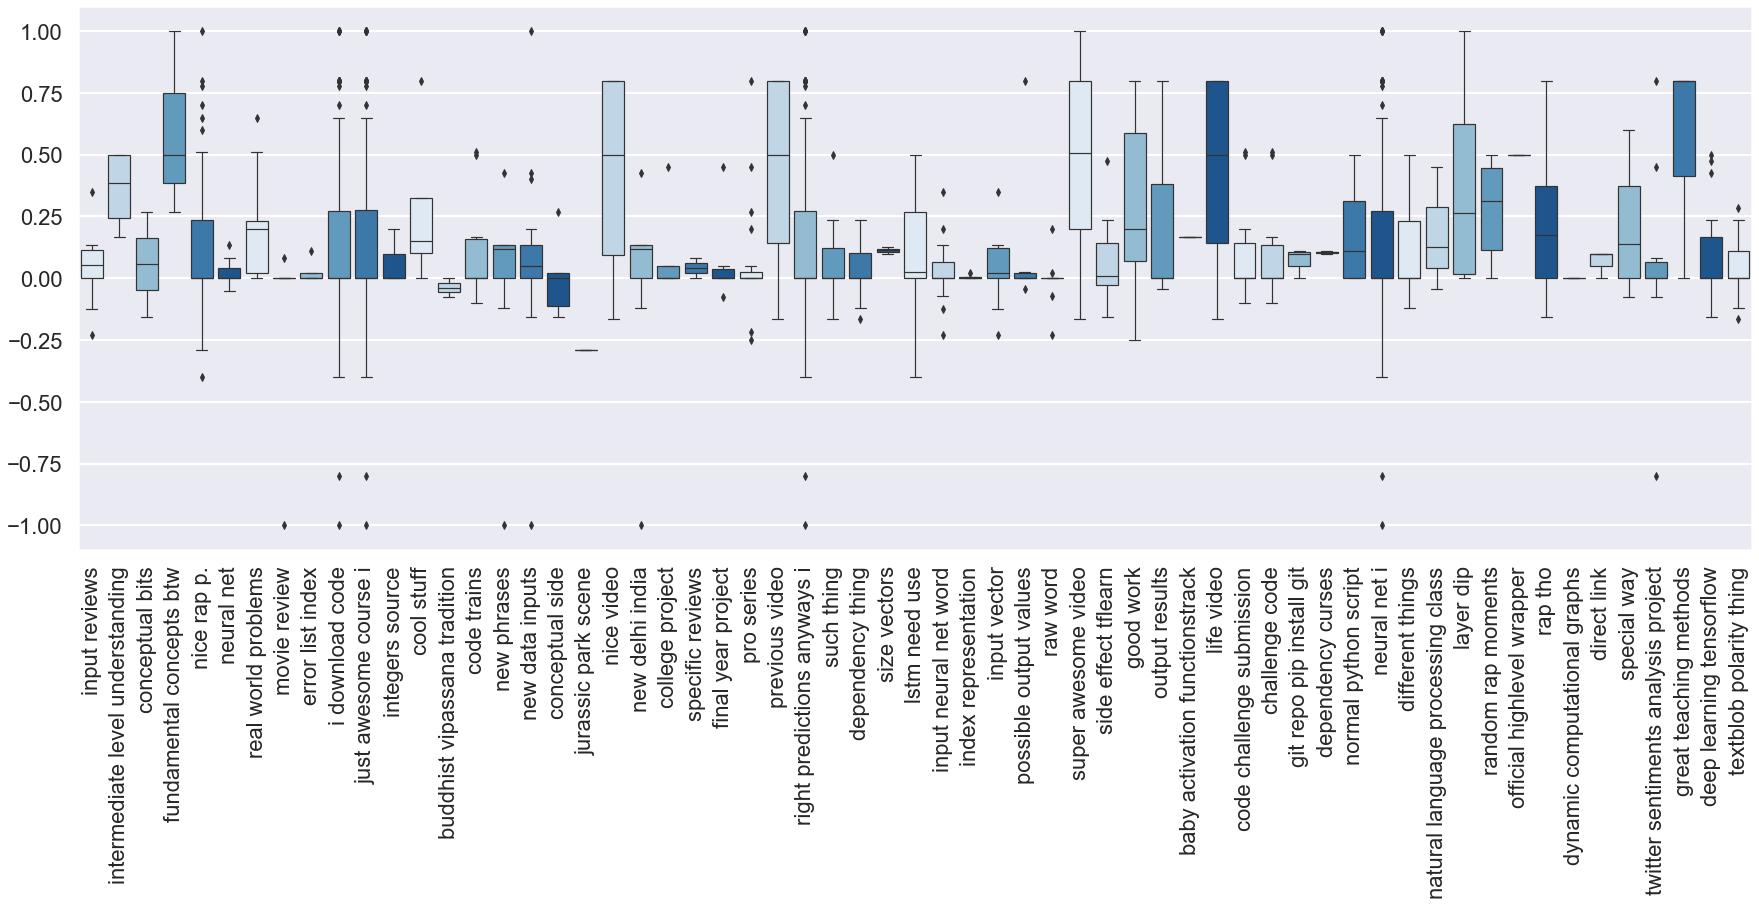

In [46]:
fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

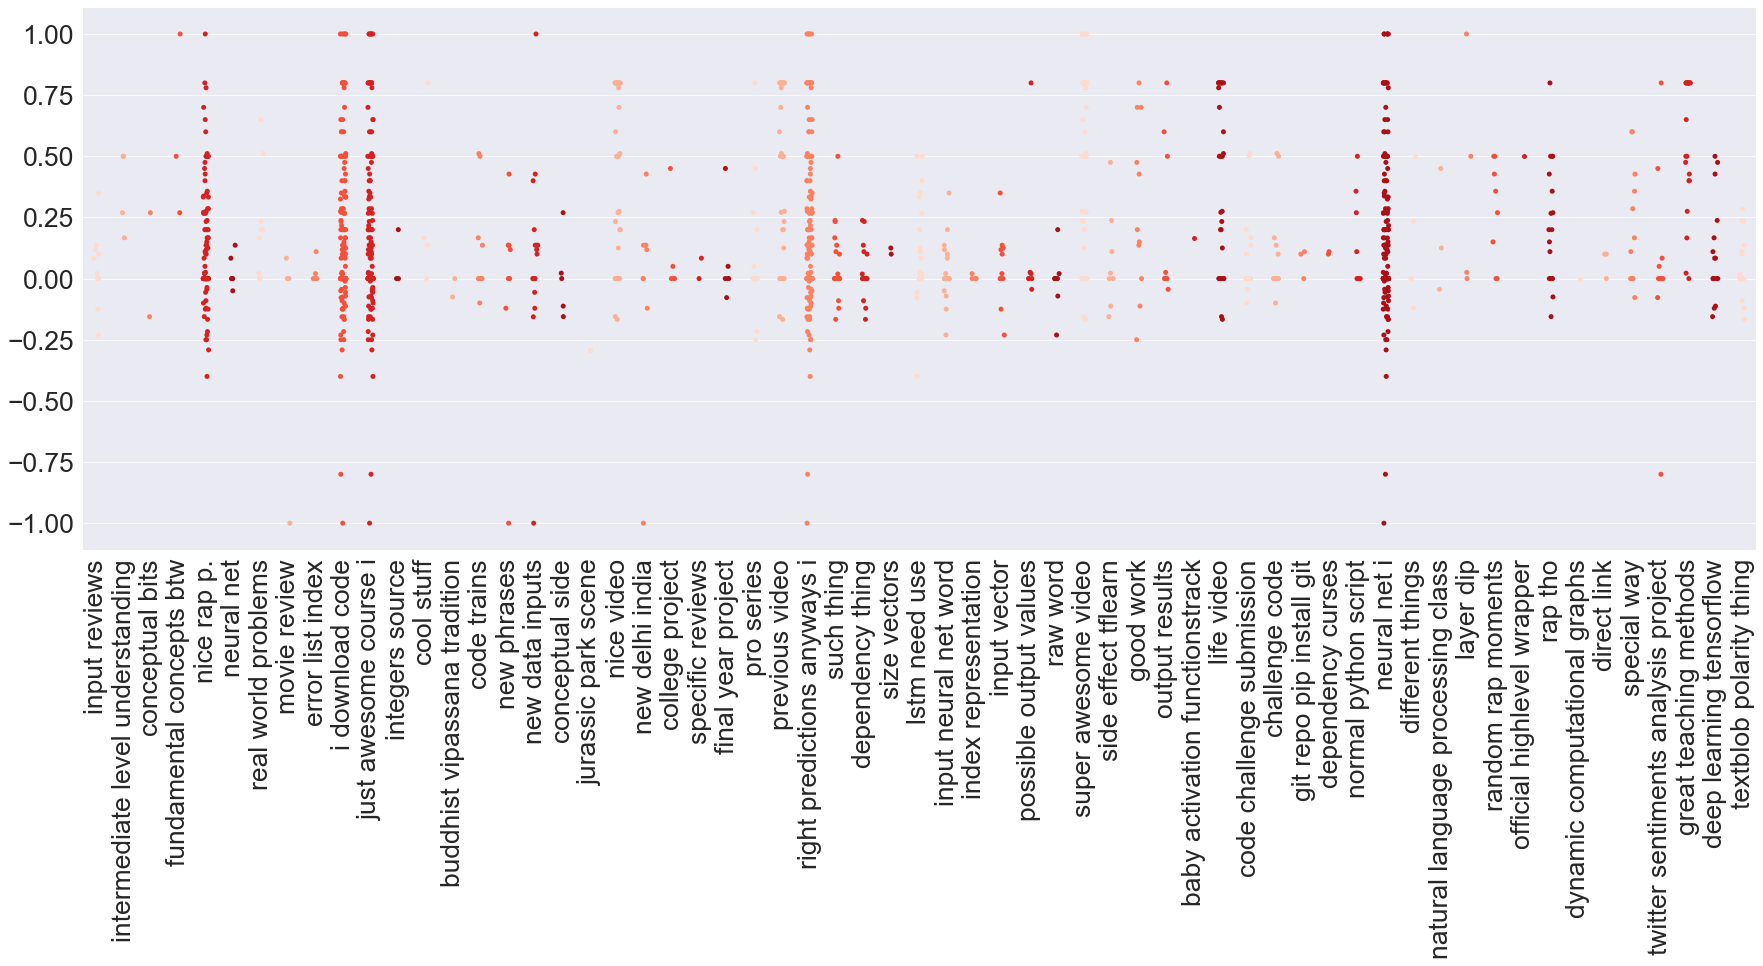

In [47]:
color = sns.color_palette("Reds", 6)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=2) 
sns.stripplot(x="aspects", y="scores",data=vals, palette=color)

## CONCLUSION
I was inspired by this research paper to carry out the feature based sentiment analysis.
https://www.aclweb.org/anthology/S15-2082.pdf